# EEG User Authentication

This project aims to authenticate users based on their EEG readings using the XGBoost model. The dataset consists of EEG recordings from multiple users who were exposed to a 1:01 minute audio stimulus.

The dataset contains 14 columns representing different channels/sensors used to record the EEG signals from different regions of the brain. Each channel/sensor records the electrical activity of a specific region of the brain. Each row in the dataset represents an epoch of EEG data.

# Import the datasets

In [1]:
import os
import pandas as pd


directory_path = r'C:\Users\Rahul Nagarajan\Desktop\Masters Project\Datasets'
csv_files = sorted([f for f in os.listdir(directory_path) if f.endswith('.csv')])
df_list = []

for filename in csv_files:
    print(filename)
    df = pd.read_csv(os.path.join(directory_path, filename), skiprows=1, index_col=None, header=0)
    freq_bands = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
    df = df.loc[:, freq_bands]
    df_list.append(df)

Abdullah1.csv
Andrew1.csv
Cleo1.csv
Cris1.csv
Kevin1.csv
Mal1.csv
Rahul1.csv
Shane1.csv
Vishwa1.csv


In [2]:
#Testing function 
def tester(input_data):
    freq_bands = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
    test_df = pd.DataFrame(input_data, columns=freq_bands)
    return test_df

# test_df = tester(input_data)

In [3]:
df_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4290.769043,4283.077148,4305.512695,4300.769043,4295.897461,4458.333496,4297.820313,4277.179688,4265.128418,4264.615234,4444.358887,4472.820313,4365.769043,4405.769043
1,4292.820313,4292.436035,4312.820313,4308.461426,4298.205078,4450.384766,4317.051270,4282.436035,4275.384766,4270.512695,4451.282227,4479.102539,4367.051270,4406.666504
2,4296.666504,4295.897461,4311.922852,4306.153809,4297.307617,4444.871582,4327.051270,4291.922852,4281.794922,4276.922852,4459.487305,4489.615234,4374.615234,4412.051270
3,4295.641113,4281.410156,4310.128418,4296.666504,4293.461426,4436.794922,4330.256348,4299.487305,4281.410156,4278.846191,4457.051270,4491.666504,4374.871582,4412.948730
4,4292.948730,4273.974121,4307.820313,4294.358887,4292.820313,4417.692383,4318.461426,4298.077148,4282.692383,4275.000000,4453.589844,4488.205078,4368.333496,4406.794922


In [4]:
df_list[0].shape

(7814, 14)

In [5]:
print("Columns: ", df_list[0].columns)
print("Total number of columns: ",len(df_list[0].columns))

Columns:  Index(['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
       'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4'],
      dtype='object')
Total number of columns:  14


In [6]:
#Create a copy of the original EEG datasets
import copy
df_raw_list = copy.deepcopy(df_list)

In [7]:
df_raw_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4290.769043,4283.077148,4305.512695,4300.769043,4295.897461,4458.333496,4297.820313,4277.179688,4265.128418,4264.615234,4444.358887,4472.820313,4365.769043,4405.769043
1,4292.820313,4292.436035,4312.820313,4308.461426,4298.205078,4450.384766,4317.051270,4282.436035,4275.384766,4270.512695,4451.282227,4479.102539,4367.051270,4406.666504
2,4296.666504,4295.897461,4311.922852,4306.153809,4297.307617,4444.871582,4327.051270,4291.922852,4281.794922,4276.922852,4459.487305,4489.615234,4374.615234,4412.051270
3,4295.641113,4281.410156,4310.128418,4296.666504,4293.461426,4436.794922,4330.256348,4299.487305,4281.410156,4278.846191,4457.051270,4491.666504,4374.871582,4412.948730
4,4292.948730,4273.974121,4307.820313,4294.358887,4292.820313,4417.692383,4318.461426,4298.077148,4282.692383,4275.000000,4453.589844,4488.205078,4368.333496,4406.794922


# Preprocessing 

In [8]:
import numpy as np
import mne

def apply_ica(df_list):
    sfreq = 128.0
    n_components = 6
    method = 'fastica'
    random_state = 42
    l_freq = 1.0
    h_freq = 50.0
    filter_length = 'auto'
    fir_design = 'firwin'
    ref_channels = 'average'
    ch_names = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
    eog_ch_names = ['EEG.AF3', 'EEG.F7', 'EEG.F8', 'EEG.AF4', 'EEG.F3', 'EEG.F4']
    
    preprocessed_data = []
    ica_objects = []
    
    for i, df in enumerate(df_list):
        data = df.to_numpy()
        info = mne.create_info(ch_names, sfreq, ch_types=['eeg'] * 14)
        raw = mne.io.RawArray(data.T, info)

        eog_indices = [ch_names.index(ch) for ch in eog_ch_names]
        ch_types = ['eog' if i in eog_indices else 'eeg' for i in range(len(ch_names))]
        raw.set_channel_types(dict(zip(ch_names, ch_types)))

        raw = filter_data(raw, l_freq, h_freq, filter_length, fir_design)
        raw.set_eeg_reference(ref_channels=ref_channels)

        ica = create_and_apply_ica(raw, n_components, method, random_state)
        
        ica_objects.append(ica)
        preprocessed_data.append(pd.DataFrame(raw.get_data().T, columns=ch_names))

    return (preprocessed_data,ica_objects) 

def filter_data(raw, l_freq, h_freq, filter_length, fir_design):
    raw.filter(l_freq=l_freq, h_freq=h_freq, l_trans_bandwidth='auto', h_trans_bandwidth='auto', filter_length=filter_length, fir_design=fir_design)
    return raw

def create_and_apply_ica(raw, n_components, method, random_state):
    ica = mne.preprocessing.ICA(n_components=n_components, method=method, random_state=random_state, max_iter=16000)
    ica.fit(raw)

    eog_epochs = mne.preprocessing.create_eog_epochs(raw, reject_by_annotation=False)
    eog_inds, eog_scores = ica.find_bads_eog(eog_epochs)
    ica.exclude += eog_inds
    ica.apply(raw)

    return ica


In [9]:
df_list, ica_objects = apply_ica(df_list)

Creating RawArray with float64 data, n_channels=14, n_times=7814
    Range : 0 ... 7813 =      0.000 ...    61.039 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.1s.
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=14, n_times=7816
    Range : 0 ... 7815 =      0.000 ...    61.055 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be p

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0

Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Not setting metadata
5 matching events found
No baseline correction applied
Using data from preloaded Raw for 5 events and 129 original time points ...
0 bad epochs dropped
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, EEG.AF4
Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=14, n_times=7814
    Range : 0 ... 7813 =    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=14, n_times=7816
    Range : 0 ... 7815 =      0.000 ...    61.055 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be p

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0

    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=14, n_times=7815
    Range : 0 ... 7814 =      0.000 ...    61.047 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be patient, this may take a while

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0


FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 4 significant peaks
Number of EOG events detected: 4
Not setting metadata
4 matching events found
No baseline correction applied
Using data from preloaded Raw for 4 events and 129 original time points ...
0 bad epochs dropped
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, EEG.AF4
Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [10]:
df_list[0]

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4290.769043,4283.077148,4305.512695,-5.450018e-14,-6.334714e-13,3.515635e-14,6.554344e-13,-2.851941e-13,3.043614e-13,2.618003e-13,-2.836050e-13,4472.820313,4365.769043,4405.769043
1,4292.820313,4292.436035,4312.820313,1.150971e+00,-4.285476e+00,-1.030772e+01,1.261713e+01,-1.707948e+00,3.341400e+00,-8.955410e-01,8.718578e-02,4479.102539,4367.051270,4406.666504
2,4296.666504,4295.897461,4311.922852,-5.519771e+00,-9.571875e+00,-1.595766e+01,1.810862e+01,3.132779e+00,5.041184e+00,1.025509e+00,3.741216e+00,4489.615234,4374.615234,4412.051270
3,4295.641113,4281.410156,4310.128418,-1.384625e+01,-1.234407e+01,-1.875281e+01,2.245886e+01,1.128352e+01,5.394259e+00,3.737236e+00,2.069247e+00,4491.666504,4374.871582,4412.948730
4,4292.948730,4273.974121,4307.820313,-1.143461e+01,-8.260417e+00,-2.886269e+01,1.520162e+01,1.442861e+01,1.111906e+01,4.579566e+00,3.228855e+00,4488.205078,4368.333496,4406.794922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,4311.410156,4299.102539,4316.410156,-5.179838e+00,-2.419151e+00,1.246175e+01,1.188026e+00,-6.371113e+00,-2.882895e-01,7.048094e-01,-9.619786e-02,4491.153809,4388.205078,4522.820313
7810,4316.025879,4296.282227,4331.922852,-1.037837e+01,-7.216802e+00,6.280633e+00,7.190424e+00,-8.891063e+00,9.622116e+00,6.093038e+00,-2.699980e+00,4507.051270,4395.384766,4521.666504
7811,4322.179688,4291.410156,4333.077148,-5.918071e+00,-4.326325e+00,6.259572e+00,5.929495e+00,-9.642253e+00,7.753818e+00,8.890493e+00,-8.946729e+00,4509.487305,4383.333496,4518.333496
7812,4322.179688,4298.974121,4327.179688,5.164067e+00,3.392496e+00,7.058979e+00,-7.253169e-01,-7.541228e+00,-2.691990e+00,4.115857e+00,-8.772863e+00,4502.948730,4371.538574,4515.128418


In [11]:
import matplotlib.pyplot as plt
def visualize(df_original, df_filtered, ica_object):
    ch_names = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
    info = mne.create_info(ch_names, sfreq=128, ch_types='eeg')

    raw_original = mne.io.RawArray(df_original.T.to_numpy(), info)
    raw_filtered = mne.io.RawArray(df_filtered.T.to_numpy(), info)

    start_time = 0
    
    raw_filtered.plot(scalings='auto', start=start_time, show=False)
    plt.show()

    ica_object.plot_sources(raw_filtered, start=start_time, show=False)
    plt.show()

Creating RawArray with float64 data, n_channels=14, n_times=7814
    Range : 0 ... 7813 =      0.000 ...    61.039 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=7814
    Range : 0 ... 7813 =      0.000 ...    61.039 secs
Ready.
Using matplotlib as 2D backend.


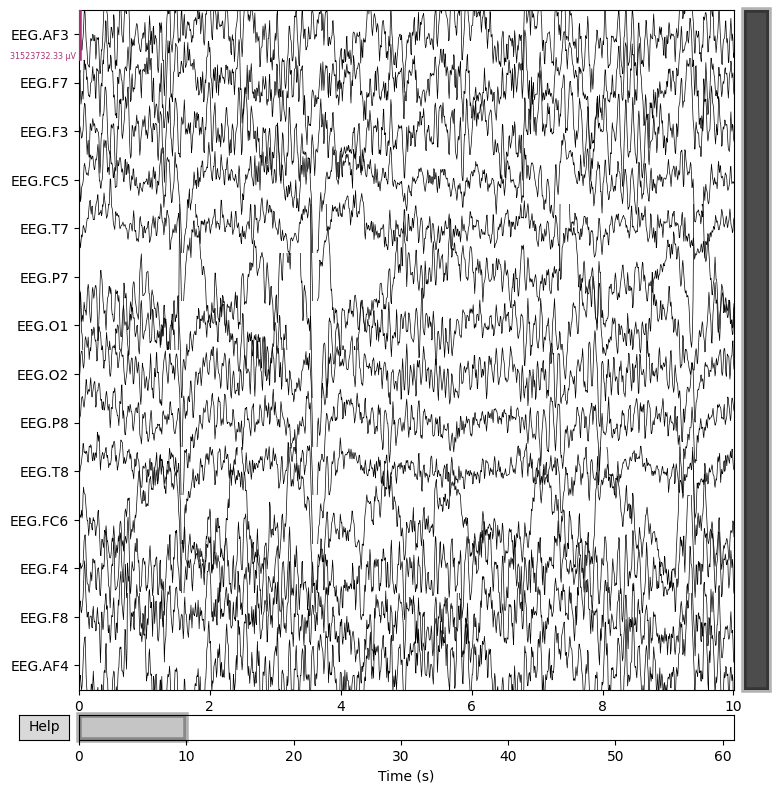

Creating RawArray with float64 data, n_channels=6, n_times=7814
    Range : 0 ... 7813 =      0.000 ...    61.039 secs
Ready.


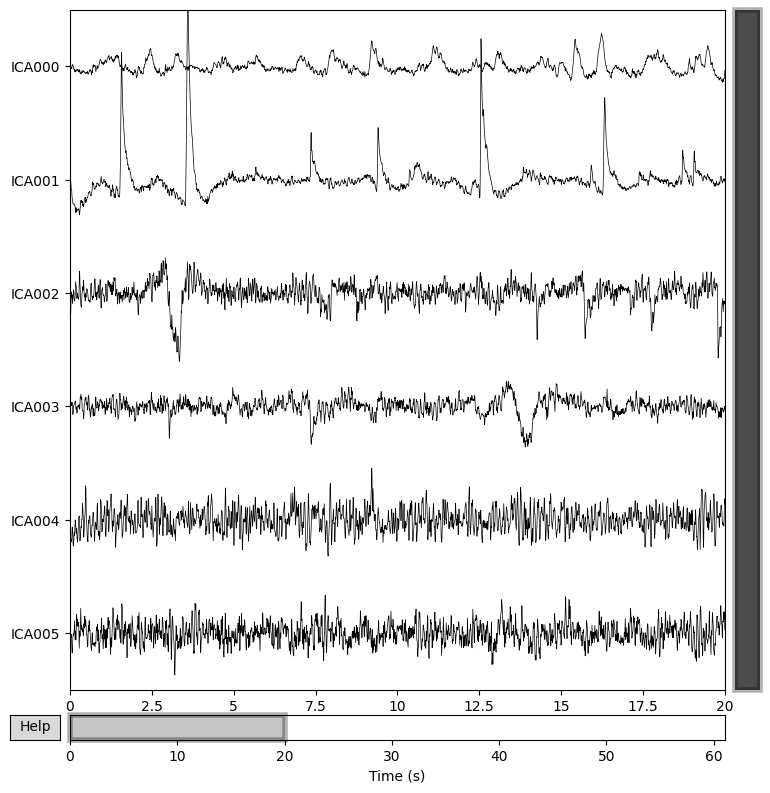

In [12]:
visualize(df_raw_list[0], df_list[0], ica_objects[0])

In [13]:
def window_data(df_list):
    
    window_size = 256
    overlap = 0.5
    
    windowed_data = []

    for i, df in enumerate(df_list):
        windows = []
        start = 0
        end = window_size

        while end <= len(df):
            window = df.iloc[start:end].to_numpy().T
            windows.append(window)

            start += int(window_size * (1 - overlap))
            end += int(window_size * (1 - overlap))

        windowed_data.append(windows)

    return windowed_data

In [14]:
df_list = window_data(df_list)

In [15]:
df_list[0]

[array([[4290.769043, 4292.820313, 4296.666504, ..., 4328.589844,
         4325.897461, 4327.179688],
        [4283.077148, 4292.436035, 4295.897461, ..., 4314.743652,
         4313.461426, 4307.820313],
        [4305.512695, 4312.820313, 4311.922852, ..., 4335.512695,
         4340.641113, 4340.      ],
        ...,
        [4472.820313, 4479.102539, 4489.615234, ..., 4521.666504,
         4519.871582, 4522.307617],
        [4365.769043, 4367.05127 , 4374.615234, ..., 4394.615234,
         4399.615234, 4399.743652],
        [4405.769043, 4406.666504, 4412.05127 , ..., 4444.743652,
         4448.077148, 4439.743652]]),
 array([[4298.717773, 4305.256348, 4298.333496, ..., 4281.025879,
         4282.563965, 4294.358887],
        [4295.128418, 4300.      , 4298.333496, ..., 4277.563965,
         4279.487305, 4288.589844],
        [4316.025879, 4319.102539, 4310.897461, ..., 4291.666504,
         4296.282227, 4299.487305],
        ...,
        [4490.897461, 4492.692383, 4487.692383, ..., 4

# Feature Extraction

In [16]:
from scipy.signal import welch

def extract_features(windowed_data):
    freq_bands = {'delta': (1, 4),
                  'theta': (4, 8),
                  'alpha': (8, 12),
                  'beta': (12, 30),
                  'gamma': (30, 50)}

    features_list = []

    for user_windows in windowed_data:
        features = []

        for window in user_windows:
            psd_features = []

            for channel in window:
                nperseg = min(len(channel), 128)
                freqs, psd = welch(channel, fs=128, nperseg=nperseg, nfft=nperseg)

                band_powers = []
                for fmin, fmax in freq_bands.values():
                    idx_min = np.argmax(freqs >= fmin)
                    idx_max = np.argmax(freqs >= fmax)
                    band_powers.append(np.sum(psd[idx_min:idx_max]))

                psd_features.append(band_powers)

            features.append(np.array(psd_features).flatten())

        column_names = [f'{ch}_{band}' for ch in range(len(window)) for band in freq_bands.keys()]
        features_df = pd.DataFrame(features, columns=column_names)
        features_list.append(features_df)

    return features_list


In [17]:
#Mean, Variance, Kurtosis, Skewness and Root Mean Square
from scipy.stats import kurtosis, skew

def root_mean_square(channel):
    return np.sqrt(np.mean(np.square(channel)))

def statistical_features(windowed_data):
    features_list = []

    for user_windows in windowed_data:
        features = []

        for window in user_windows:
            stat_features = []
            for channel in window:
                mean = np.mean(channel)
                var = np.var(channel)
                kurt = kurtosis(channel)
                skewness = skew(channel)
                rms = root_mean_square(channel)
                
                channel_features = [mean, var, kurt, skewness, rms]
                stat_features.extend(channel_features)

            features.append(stat_features)

        columns = [f'{stat}_ch{i}' for i in range(len(window)) for stat in ['mean', 'var', 'kurt', 'skew', 'rms']]
        features_df = pd.DataFrame(features, columns=columns)
        features_list.append(features_df)

    return features_list

In [18]:
psd_list = extract_features(df_list.copy())

In [19]:
psd_list[0]

,0_delta,0_theta,0_alpha,0_beta,0_gamma,1_delta,1_theta,1_alpha,1_beta,1_gamma,...,12_delta,12_theta,12_alpha,12_beta,12_gamma,13_delta,13_theta,13_alpha,13_beta,13_gamma
0,24.788831,26.078945,58.006641,17.531740,7.023496,67.600333,37.573522,45.902908,14.647449,9.014789,...,32.605390,18.370721,45.297458,20.208917,12.483659,2401.784244,450.249623,251.871035,172.422877,9.499453
1,37.989512,30.391303,51.824984,15.255352,4.034177,35.580797,37.515433,42.328191,9.662243,10.396744,...,30.298307,38.263288,34.546379,12.784727,11.962124,68.618398,63.493399,57.064451,11.781937,9.545557
2,60.456990,28.695772,52.045771,17.115387,5.757120,55.053535,39.460418,24.371287,16.704027,9.716353,...,24.130236,21.645576,39.642936,17.172583,12.562260,49.785607,40.645962,61.794082,21.969839,9.843827
3,84.556436,19.234597,33.564819,14.155150,6.411681,60.218341,23.204450,15.922026,15.327575,7.214412,...,62.198216,14.438278,24.837218,18.986518,10.277578,62.434819,16.528039,35.197786,23.996144,10.058339
4,61.553045,24.311445,26.290090,16.886639,5.430804,33.865088,24.789108,12.568662,13.296035,6.670042,...,53.814670,29.659445,16.490988,28.513583,9.168813,58.478988,36.208565,34.304562,30.484398,11.886427
5,47.536535,13.162441,31.942579,18.280342,6.160196,39.634559,18.595669,19.003762,15.285321,7.818630,...,63.416041,11.115545,34.003618,22.618842,8.026206,101.261154,22.241801,71.353244,34.956242,11.696147
6,77.959508,13.490740,42.001832,19.319622,6.860377,107.599949,18.828250,23.140768,15.089456,6.906645,...,31.941964,23.398376,30.446554,14.861004,8.529623,95.223238,14.374293,47.470588,23.016706,6.003132
7,40.565899,20.203888,79.379826,11.252464,5.566385,168.528992,19.113332,53.999752,9.971628,6.123147,...,30.012786,37.129550,44.751904,15.978262,10.438503,70.639169,42.680295,75.774606,14.961560,7.021622
8,74.149212,20.929154,66.048338,11.488804,4.511841,162.399990,20.432289,54.887913,15.882856,9.105150,...,56.769694,30.884799,51.622879,18.213441,9.501943,110.166002,46.015843,76.590614,17.092620,7.552189
9,79.248995,19.267348,65.351622,14.932924,4.377062,139.784414,16.856033,47.723033,15.942625,8.454515,...,43.086891,31.658930,43.927748,21.863860,8.183392,2557.896804,1069.704185,573.142917,342.464136,10.895048


In [20]:
stat_list = statistical_features(df_list.copy())

In [21]:
stat_list[0]

,mean_ch0,var_ch0,kurt_ch0,skew_ch0,rms_ch0,mean_ch1,var_ch1,kurt_ch1,skew_ch1,rms_ch1,...,mean_ch12,var_ch12,kurt_ch12,skew_ch12,rms_ch12,mean_ch13,var_ch13,kurt_ch13,skew_ch13,rms_ch13
0,4298.409439,149.987213,0.272140,-0.000094,4298.426886,4291.761818,159.650044,-0.046441,-0.179938,4291.780418,...,4367.784458,140.027944,0.363902,0.458485,4367.800488,4423.990368,3771.051781,14.990303,3.638634,4424.416552
1,4300.730652,151.639498,0.324172,-0.144462,4300.748281,4289.876791,147.614134,-0.313408,-0.092530,4289.893996,...,4368.881708,116.719180,0.285940,0.389385,4368.895066,4411.109766,268.567015,-0.054946,0.151808,4411.140208
2,4297.460434,196.160133,0.116748,-0.378727,4297.483257,4285.054577,129.339192,0.202669,-0.371936,4285.069669,...,4367.264629,130.062292,0.003260,0.333954,4367.279520,4417.490984,181.431314,-0.344814,0.188845,4417.511520
3,4293.254715,176.010063,-0.042790,-0.214604,4293.275213,4284.781639,126.141414,0.000927,-0.464822,4284.796359,...,4360.459242,163.325004,0.305250,-0.122518,4360.477970,4415.292971,172.291078,-0.589051,-0.098082,4415.312481
4,4298.316805,159.072075,-0.259291,0.103877,4298.335309,4288.623297,99.193291,-0.478683,-0.148001,4288.634861,...,4358.841139,147.532873,-0.405019,-0.463806,4358.858062,4421.187407,253.068731,1.686066,0.627565,4421.216026
5,4301.168859,144.696995,-0.719134,0.027887,4301.185680,4287.696821,117.130951,-0.099493,0.317832,4287.710480,...,4363.116987,129.993024,-0.501539,-0.069820,4363.131884,4419.785666,290.349385,1.424449,0.397869,4419.818512
6,4296.991686,185.258354,-0.464211,0.023260,4297.013243,4285.581429,212.069009,0.455859,-0.023234,4285.606171,...,4367.781452,144.584468,-0.404146,-0.050080,4367.798003,4414.623913,231.374894,-0.457949,-0.222800,4414.650118
7,4293.904240,161.683545,-0.151774,0.133695,4293.923067,4285.268436,242.179854,-0.050871,-0.067706,4285.296694,...,4365.270422,165.905768,-0.543508,0.090044,4365.289425,4416.860477,206.589831,-0.425740,0.093228,4416.883864
8,4297.664246,196.250401,1.337743,0.881465,4297.687078,4288.720964,224.772903,-0.000386,0.266803,4288.747169,...,4361.311100,180.839206,0.671124,0.812240,4361.331832,4419.820202,275.103479,1.139649,1.018363,4419.851323
9,4302.813496,194.162996,0.262155,0.505465,4302.836058,4292.457941,240.622599,-0.308890,0.253729,4292.485970,...,4364.196219,170.542750,0.405715,0.437312,4364.215757,4444.687992,5652.168367,18.369939,4.026564,4445.323781


In [22]:
def labelData(data):
    user_list = ['Abdullah', 'Andrew', 'Cleo', 'Cris', 'Kevin', 'Malem', 'Rahul', 'Shane', 'Vishwadeep']

    for i in range(len(data)):
        df = data[i]
        df['User'] = i  

    return data

In [23]:
psd_list = labelData(psd_list)

In [24]:
stat_list = labelData(stat_list)

In [25]:
psd_list[0]

,0_delta,0_theta,0_alpha,0_beta,0_gamma,1_delta,1_theta,1_alpha,1_beta,1_gamma,...,12_theta,12_alpha,12_beta,12_gamma,13_delta,13_theta,13_alpha,13_beta,13_gamma,User
0,24.788831,26.078945,58.006641,17.531740,7.023496,67.600333,37.573522,45.902908,14.647449,9.014789,...,18.370721,45.297458,20.208917,12.483659,2401.784244,450.249623,251.871035,172.422877,9.499453,0
1,37.989512,30.391303,51.824984,15.255352,4.034177,35.580797,37.515433,42.328191,9.662243,10.396744,...,38.263288,34.546379,12.784727,11.962124,68.618398,63.493399,57.064451,11.781937,9.545557,0
2,60.456990,28.695772,52.045771,17.115387,5.757120,55.053535,39.460418,24.371287,16.704027,9.716353,...,21.645576,39.642936,17.172583,12.562260,49.785607,40.645962,61.794082,21.969839,9.843827,0
3,84.556436,19.234597,33.564819,14.155150,6.411681,60.218341,23.204450,15.922026,15.327575,7.214412,...,14.438278,24.837218,18.986518,10.277578,62.434819,16.528039,35.197786,23.996144,10.058339,0
4,61.553045,24.311445,26.290090,16.886639,5.430804,33.865088,24.789108,12.568662,13.296035,6.670042,...,29.659445,16.490988,28.513583,9.168813,58.478988,36.208565,34.304562,30.484398,11.886427,0
5,47.536535,13.162441,31.942579,18.280342,6.160196,39.634559,18.595669,19.003762,15.285321,7.818630,...,11.115545,34.003618,22.618842,8.026206,101.261154,22.241801,71.353244,34.956242,11.696147,0
6,77.959508,13.490740,42.001832,19.319622,6.860377,107.599949,18.828250,23.140768,15.089456,6.906645,...,23.398376,30.446554,14.861004,8.529623,95.223238,14.374293,47.470588,23.016706,6.003132,0
7,40.565899,20.203888,79.379826,11.252464,5.566385,168.528992,19.113332,53.999752,9.971628,6.123147,...,37.129550,44.751904,15.978262,10.438503,70.639169,42.680295,75.774606,14.961560,7.021622,0
8,74.149212,20.929154,66.048338,11.488804,4.511841,162.399990,20.432289,54.887913,15.882856,9.105150,...,30.884799,51.622879,18.213441,9.501943,110.166002,46.015843,76.590614,17.092620,7.552189,0
9,79.248995,19.267348,65.351622,14.932924,4.377062,139.784414,16.856033,47.723033,15.942625,8.454515,...,31.658930,43.927748,21.863860,8.183392,2557.896804,1069.704185,573.142917,342.464136,10.895048,0


In [26]:
stat_list[0]

,mean_ch0,var_ch0,kurt_ch0,skew_ch0,rms_ch0,mean_ch1,var_ch1,kurt_ch1,skew_ch1,rms_ch1,...,var_ch12,kurt_ch12,skew_ch12,rms_ch12,mean_ch13,var_ch13,kurt_ch13,skew_ch13,rms_ch13,User
0,4298.409439,149.987213,0.272140,-0.000094,4298.426886,4291.761818,159.650044,-0.046441,-0.179938,4291.780418,...,140.027944,0.363902,0.458485,4367.800488,4423.990368,3771.051781,14.990303,3.638634,4424.416552,0
1,4300.730652,151.639498,0.324172,-0.144462,4300.748281,4289.876791,147.614134,-0.313408,-0.092530,4289.893996,...,116.719180,0.285940,0.389385,4368.895066,4411.109766,268.567015,-0.054946,0.151808,4411.140208,0
2,4297.460434,196.160133,0.116748,-0.378727,4297.483257,4285.054577,129.339192,0.202669,-0.371936,4285.069669,...,130.062292,0.003260,0.333954,4367.279520,4417.490984,181.431314,-0.344814,0.188845,4417.511520,0
3,4293.254715,176.010063,-0.042790,-0.214604,4293.275213,4284.781639,126.141414,0.000927,-0.464822,4284.796359,...,163.325004,0.305250,-0.122518,4360.477970,4415.292971,172.291078,-0.589051,-0.098082,4415.312481,0
4,4298.316805,159.072075,-0.259291,0.103877,4298.335309,4288.623297,99.193291,-0.478683,-0.148001,4288.634861,...,147.532873,-0.405019,-0.463806,4358.858062,4421.187407,253.068731,1.686066,0.627565,4421.216026,0
5,4301.168859,144.696995,-0.719134,0.027887,4301.185680,4287.696821,117.130951,-0.099493,0.317832,4287.710480,...,129.993024,-0.501539,-0.069820,4363.131884,4419.785666,290.349385,1.424449,0.397869,4419.818512,0
6,4296.991686,185.258354,-0.464211,0.023260,4297.013243,4285.581429,212.069009,0.455859,-0.023234,4285.606171,...,144.584468,-0.404146,-0.050080,4367.798003,4414.623913,231.374894,-0.457949,-0.222800,4414.650118,0
7,4293.904240,161.683545,-0.151774,0.133695,4293.923067,4285.268436,242.179854,-0.050871,-0.067706,4285.296694,...,165.905768,-0.543508,0.090044,4365.289425,4416.860477,206.589831,-0.425740,0.093228,4416.883864,0
8,4297.664246,196.250401,1.337743,0.881465,4297.687078,4288.720964,224.772903,-0.000386,0.266803,4288.747169,...,180.839206,0.671124,0.812240,4361.331832,4419.820202,275.103479,1.139649,1.018363,4419.851323,0
9,4302.813496,194.162996,0.262155,0.505465,4302.836058,4292.457941,240.622599,-0.308890,0.253729,4292.485970,...,170.542750,0.405715,0.437312,4364.215757,4444.687992,5652.168367,18.369939,4.026564,4445.323781,0


In [27]:
def combine_data(features_list): 
    combined_df = pd.concat(features_list, axis=0, ignore_index=True)
    return combined_df 

In [28]:
psd_list = combine_data(psd_list) 

In [29]:
stat_list = combine_data(stat_list)

In [30]:
psd_list

,0_delta,0_theta,0_alpha,0_beta,0_gamma,1_delta,1_theta,1_alpha,1_beta,1_gamma,...,12_theta,12_alpha,12_beta,12_gamma,13_delta,13_theta,13_alpha,13_beta,13_gamma,User
0,24.788831,26.078945,58.006641,17.531740,7.023496,67.600333,37.573522,45.902908,14.647449,9.014789,...,18.370721,45.297458,20.208917,12.483659,2401.784244,450.249623,251.871035,172.422877,9.499453,0
1,37.989512,30.391303,51.824984,15.255352,4.034177,35.580797,37.515433,42.328191,9.662243,10.396744,...,38.263288,34.546379,12.784727,11.962124,68.618398,63.493399,57.064451,11.781937,9.545557,0
2,60.456990,28.695772,52.045771,17.115387,5.757120,55.053535,39.460418,24.371287,16.704027,9.716353,...,21.645576,39.642936,17.172583,12.562260,49.785607,40.645962,61.794082,21.969839,9.843827,0
3,84.556436,19.234597,33.564819,14.155150,6.411681,60.218341,23.204450,15.922026,15.327575,7.214412,...,14.438278,24.837218,18.986518,10.277578,62.434819,16.528039,35.197786,23.996144,10.058339,0
4,61.553045,24.311445,26.290090,16.886639,5.430804,33.865088,24.789108,12.568662,13.296035,6.670042,...,29.659445,16.490988,28.513583,9.168813,58.478988,36.208565,34.304562,30.484398,11.886427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,55.306108,58.644633,100.813918,11.515283,4.038442,26.972421,28.625651,44.515815,10.171386,4.627556,...,46.219811,78.469237,21.382883,3.425078,98.668548,64.725383,112.990955,19.324086,5.715333,8
536,61.063299,68.114568,91.124206,19.395772,4.820870,32.119236,36.402256,57.597284,15.984898,5.783775,...,31.949317,55.205336,23.699407,5.463893,110.374168,63.347708,66.082514,29.695669,8.029497,8
537,44.218586,42.779302,153.575306,21.108878,4.483579,30.411438,17.570213,96.072661,13.327154,5.728966,...,20.791705,64.421547,17.782183,4.694680,107.021908,36.783387,101.282727,33.679562,7.444878,8
538,39.156278,18.903009,182.660688,14.153729,7.197993,23.218866,10.212067,110.086035,10.222384,7.523033,...,20.183458,66.134487,12.684264,6.304772,101.186798,39.257793,110.785822,27.220925,10.184231,8


In [31]:
stat_list

,mean_ch0,var_ch0,kurt_ch0,skew_ch0,rms_ch0,mean_ch1,var_ch1,kurt_ch1,skew_ch1,rms_ch1,...,var_ch12,kurt_ch12,skew_ch12,rms_ch12,mean_ch13,var_ch13,kurt_ch13,skew_ch13,rms_ch13,User
0,4298.409439,149.987213,0.272140,-0.000094,4298.426886,4291.761818,159.650044,-0.046441,-0.179938,4291.780418,...,140.027944,0.363902,0.458485,4367.800488,4423.990368,3771.051781,14.990303,3.638634,4424.416552,0
1,4300.730652,151.639498,0.324172,-0.144462,4300.748281,4289.876791,147.614134,-0.313408,-0.092530,4289.893996,...,116.719180,0.285940,0.389385,4368.895066,4411.109766,268.567015,-0.054946,0.151808,4411.140208,0
2,4297.460434,196.160133,0.116748,-0.378727,4297.483257,4285.054577,129.339192,0.202669,-0.371936,4285.069669,...,130.062292,0.003260,0.333954,4367.279520,4417.490984,181.431314,-0.344814,0.188845,4417.511520,0
3,4293.254715,176.010063,-0.042790,-0.214604,4293.275213,4284.781639,126.141414,0.000927,-0.464822,4284.796359,...,163.325004,0.305250,-0.122518,4360.477970,4415.292971,172.291078,-0.589051,-0.098082,4415.312481,0
4,4298.316805,159.072075,-0.259291,0.103877,4298.335309,4288.623297,99.193291,-0.478683,-0.148001,4288.634861,...,147.532873,-0.405019,-0.463806,4358.858062,4421.187407,253.068731,1.686066,0.627565,4421.216026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4299.868795,309.356052,-0.259035,0.209393,4299.904768,4290.386627,193.678615,-0.768554,-0.207861,4290.409198,...,242.294336,-0.273142,-0.362954,4364.750317,4430.785252,335.863975,-0.584747,0.359206,4430.823153,8
536,4289.948912,285.616611,0.226726,0.481308,4289.982201,4282.614193,195.683117,-0.586087,0.329013,4282.637039,...,203.554467,-0.046621,-0.088247,4364.625684,4420.258917,376.249005,0.229296,0.089102,4420.301476,8
537,4291.178892,336.978880,1.044391,0.683516,4291.218156,4282.980770,212.471832,-0.479765,0.287412,4283.005574,...,251.077925,0.830156,0.736894,4366.253728,4426.469851,608.080005,0.549508,0.480166,4426.538537,8
538,4293.667875,274.762121,1.273289,0.681773,4293.699871,4285.813293,194.479837,-0.542870,-0.038169,4285.835982,...,398.586491,0.324060,0.717545,4356.612253,4436.647127,402.888559,0.512230,0.785767,4436.692532,8


In [32]:
#MI(X, Y) = sum(P(x, y) * log(P(x, y) / (P(x) * P(y))))

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

def feature_selection(features, k):
    labels = features.iloc[:, -1] 
    features_no_labels = features.iloc[:, :-1] 
        
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_features = selector.fit_transform(features_no_labels, labels)
    selected_features_df = pd.DataFrame(selected_features, columns=features_no_labels.columns[selector.get_support()])
    selected_features_df['label'] = labels 
    
    return selected_features_df

In [33]:
psd_list = feature_selection(psd_list, 10)

In [34]:
psd_list

,0_beta,2_gamma,3_gamma,6_gamma,7_alpha,9_beta,9_gamma,10_gamma,11_gamma,12_gamma,label
0,17.531740,5.252473,4.255862,3.383750,38.908880,8.757431,4.342892,3.179682,5.983906,12.483659,0
1,15.255352,5.998200,4.632954,4.385169,28.822153,10.740973,3.510247,6.063200,6.992213,11.962124,0
2,17.115387,3.913740,6.705507,5.356896,31.757842,7.492689,3.341676,5.345753,6.980203,12.562260,0
3,14.155150,5.444539,6.092682,4.716391,29.135519,4.881372,3.693358,2.935523,8.962867,10.277578,0
4,16.886639,4.882427,2.800677,4.582920,11.487510,6.125099,3.218564,4.108077,5.782935,9.168813,0
...,...,...,...,...,...,...,...,...,...,...,...
535,11.515283,3.978744,3.994778,5.747665,346.420731,9.111212,8.873288,4.052063,8.152977,3.425078,8
536,19.395772,6.091194,2.794596,7.298811,160.444760,11.721713,9.853906,4.226148,12.155316,5.463893,8
537,21.108878,4.839860,2.638138,9.403756,255.442377,14.272802,11.704916,2.874093,11.081525,4.694680,8
538,14.153729,4.732809,2.574534,13.576683,300.285590,17.058372,10.554060,3.632208,13.096029,6.304772,8


In [35]:
stat_list = feature_selection(stat_list, 10)

In [36]:
stat_list 

,var_ch0,var_ch1,var_ch4,rms_ch4,var_ch7,rms_ch7,var_ch10,rms_ch10,var_ch11,var_ch12,label
0,149.987213,159.650044,148.609673,12.251799,215.421699,15.167646,518.688695,22.793961,147.963016,140.027944,0
1,151.639498,147.614134,130.394250,11.440698,159.855565,12.644397,809.758074,28.536615,172.619321,116.719180,0
2,196.160133,129.339192,291.700226,17.107672,289.247962,17.037325,819.928764,28.635951,198.621941,130.062292,0
3,176.010063,126.141414,309.404925,17.636448,284.212502,16.889320,551.327241,23.492876,145.639878,163.325004,0
4,159.072075,99.193291,68.640582,8.479183,77.862243,8.934983,199.997428,14.561131,140.212489,147.532873,0
...,...,...,...,...,...,...,...,...,...,...,...
535,309.356052,193.678615,95.277421,9.770405,402.292271,20.064648,111.647585,10.576853,522.043481,242.294336,8
536,285.616611,195.683117,61.519878,7.843957,272.649033,16.517077,94.744733,9.733699,222.498952,203.554467,8
537,336.978880,212.471832,100.016283,10.058808,439.515067,20.966688,104.241569,10.224415,331.151075,251.077925,8
538,274.762121,194.479837,107.920681,10.395186,420.648071,20.509716,92.558149,9.621041,283.168225,398.586491,8


# Modelling

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

all_data = psd_list.copy()

# Separate features and labels
X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train the model
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9629629629629629

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00        18
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        18
           7       0.93      0.78      0.85        18
           8       1.00      1.00      1.00        18

    accuracy                           0.96       162
   macro avg       0.97      0.96      0.96       162
weighted avg       0.97      0.96      0.96       162



In [38]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))


Accuracy (KNN): 0.9259259259259259

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.93      0.72      0.81        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.95      1.00      0.97        18
           5       1.00      0.94      0.97        18
           6       1.00      1.00      1.00        18
           7       0.82      0.78      0.80        18
           8       0.86      1.00      0.92        18

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.92       162
weighted avg       0.93      0.93      0.92       162



In [39]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100, random_state=123)

rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.9814814814814815

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       0.94      0.94      0.94        18
           8       1.00      1.00      1.00        18

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.9753086419753086

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.94      0.89      0.91        18
           5       0.94      0.94      0.94        18
           6       1.00      1.00      1.00        18
           7       1.00      0.94      0.97        18
           8       1.00      1.00      1.00        18

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
torch.manual_seed(0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = len(np.unique(y))

# Define the model
class FFNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FFNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

input_size = X_train_scaled.shape[1]
model = FFNNModel(input_size, num_classes)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    y_pred = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.tolist())

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9691358024691358

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.89      0.91        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       0.85      0.94      0.89        18
           8       1.00      1.00      1.00        18

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



# Testing

In [42]:
directory_path = r'C:\Users\Rahul Nagarajan\Desktop\Masters Project\Datasets\Validation'

csv_files = sorted([f for f in os.listdir(directory_path) if f.endswith('.csv')])

unseen_list = []


for filename in csv_files:
    print(filename)
    df = pd.read_csv(os.path.join(directory_path, filename), skiprows=1, index_col=None, header=0)
    freq_bands = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
    df = df.loc[:, freq_bands]
    unseen_list.append(df)

Abdullah2.csv
Andrew2.csv
Cleo2.csv
Cris2.csv
Kevin2.csv
Mal2.csv
Rahul2.csv
Shane2.csv
Vishwa2.csv


In [43]:
unseen_list[0]

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4276.794922,4283.205078,4292.820313,4296.794922,4284.358887,4280.384766,4293.717773,4266.666504,4280.512695,4273.974121,4428.205078,4475.641113,4356.410156,4410.000000
1,4276.025879,4293.205078,4291.666504,4296.922852,4288.205078,4277.051270,4284.230957,4264.358887,4278.461426,4264.230957,4423.974121,4471.666504,4351.025879,4400.256348
2,4275.128418,4293.846191,4293.461426,4297.563965,4289.487305,4276.410156,4278.974121,4262.948730,4279.358887,4268.974121,4427.692383,4470.769043,4354.871582,4401.538574
3,4286.922852,4296.922852,4302.820313,4308.461426,4292.307617,4278.461426,4279.230957,4265.384766,4283.333496,4280.000000,4438.974121,4483.461426,4369.358887,4418.846191
4,4301.025879,4310.897461,4313.974121,4320.897461,4295.000000,4278.205078,4279.230957,4265.769043,4282.307617,4282.948730,4448.846191,4497.179688,4380.384766,4432.179688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,4235.256348,4285.128418,4274.230957,4295.641113,4294.615234,4283.974121,4278.974121,4281.538574,4279.871582,4264.102539,4403.205078,4443.077148,4312.563965,4307.307617
7811,4235.769043,4279.615234,4276.153809,4294.615234,4293.974121,4273.205078,4269.230957,4279.487305,4278.846191,4261.922852,4398.077148,4442.563965,4310.256348,4310.512695
7812,4232.307617,4281.153809,4277.820313,4292.179688,4282.307617,4261.282227,4261.538574,4276.410156,4269.487305,4252.948730,4390.000000,4442.179688,4308.846191,4300.128418
7813,4230.769043,4282.179688,4275.256348,4293.846191,4280.897461,4268.205078,4266.282227,4276.794922,4268.205078,4250.000000,4379.102539,4441.410156,4306.410156,4291.538574


In [44]:
#apply ica on unseen data
unseen_list, ica_unseen = apply_ica(unseen_list)

Creating RawArray with float64 data, n_channels=14, n_times=7815
    Range : 0 ... 7814 =      0.000 ...    61.047 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.0s.
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0

- Filter length: 1280 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 127 significant peaks
Number of EOG events detected: 127
Not setting metadata
127 matching events found
No baseline correction applied
Using data from preloaded Raw for 127 events and 129 original time points ...
2 bad epochs dropped
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, EEG.AF4
Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=14, n_times=7815
    Range : 0 ... 7814 =      0.000 ...    61.047 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuatio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=14, n_times=7814
    Range : 0 ... 7813 =      0.000 ...    61.039 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.0s.
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0


FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 51 significant peaks
Number of EOG events detected: 51
Not setting metadata
51 matching events found
No baseline correction applied
Using data from preloaded Raw for 51 events and 129 original time points ...
1 bad epochs dropped
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, EEG.AF4
Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_chann

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

Fitting ICA took 4.8s.
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, EEG.AF4
EOG channel index for this subject is: [ 0  1  2 11 12 13]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 142 significant peaks
Number of EOG events detected: 142
Not setting metadata
142 matching events found
No baseline correction applied
Using data from preloaded Raw for 142 events and 129 original time points ...
4 bad 

C:\Users\Rahul Nagarajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Not setting metadata
46 matching events found
No baseline correction applied
Using data from preloaded Raw for 46 events and 129 original time points ...
2 bad epochs dropped
Using EOG channels: EEG.AF3, EEG.F7, EEG.F3, EEG.F4, EEG.F8, EEG.AF4
Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components
Creating RawArray with float64 data, n_channels=14, n_times=7815
    Range : 0 ... 7814 =      0.000 ...    61.047 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components


In [45]:
#window unseen data
unseen_list = window_data(unseen_list)

In [46]:
#pass the unseen_list to the feature extraction function
unseen_list = extract_features(unseen_list)

In [47]:
usernames = {
    0: "Abdullah",
    1: "Andrew",
    2: "Cleo",
    3: "Cris",
    4: "Kevin",
    5: "Malem",
    6: "Rahul",
    7: "Shane",
    8: "Vishwadeep"
}

from collections import Counter
from sklearn.svm import SVC

def select_features(unseen_data, selected_columns):
    unseen_data = unseen_data[selected_columns]
    return unseen_data

selected_columns = psd_list.columns[:-1]  
unseen_data = select_features(unseen_list[2], selected_columns)

predicted_labels = rf.predict(unseen_data)

counter = Counter(predicted_labels)
majority_label = counter.most_common(1)[0][0]
majority_label_count = counter.most_common(1)[0][1]

predicted_username = usernames[majority_label]
confidence = majority_label_count / len(predicted_labels)

#confidence level treshold
confidence_threshold = 0.9

if confidence >= confidence_threshold:
    print("Welcome to the system,", predicted_username)
    
elif confidence < 0.9 and confidence > 0.6: 
    print("Likely", predicted_username)
    
else: 
    print("Access denied")

print("Confidence: {:.2f}%".format(confidence * 100))

Likely Andrew
Confidence: 76.67%


In [48]:
usernames = {
    0: "Abdullah",
    1: "Andrew",
    2: "Cleo",
    3: "Cris",
    4: "Kevin",
    5: "Malem",
    6: "Rahul",
    7: "Shane",
    8: "Vishwadeep"
}

from collections import Counter

def select_features(unseen_data, selected_columns):
    unseen_data = unseen_data[selected_columns]
    return unseen_data

selected_columns = psd_list.columns[:-1]
unseen_data = select_features(unseen_list[7], selected_columns)

unseen_data_scaled = scaler.transform(unseen_data)

unseen_data_tensor = torch.tensor(unseen_data_scaled, dtype=torch.float32)

model.eval()
y_pred_unseen = []
with torch.no_grad():
    outputs = model(unseen_data_tensor)
    _, predicted = torch.max(outputs, 1)
    y_pred_unseen.extend(predicted.tolist())

counter = Counter(y_pred_unseen)
majority_label = counter.most_common(1)[0][0]

predicted_username = usernames[majority_label]

confidence = counter[majority_label] / len(y_pred_unseen)

confidence_threshold = 0.9

if confidence >= confidence_threshold:
    print("Welcome to the system,", predicted_username)
    
elif confidence < 0.9 and confidence >= 0.6: 
    print("Likely", predicted_username)
    
else: 
    print("Access denied")

print("Confidence: {:.2f}%".format(confidence * 100))


Likely Shane
Confidence: 60.00%


In [49]:
model_path = 'EEG_Model'
torch.save(model.state_dict(), model_path)